## Bike sharing demand


#### 데이터분석과 시각화, 머신러닝 알고리즘으로 시간당 자전거 대여량을 예측하기

이번 캐글 경진대회는 시간당 자전거 대여량을 예측하는 [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand) 입니다. 워싱턴 D.C 소재의 자전거 대여 스타트업 [Capital Bikeshare](https://www.capitalbikeshare.com/)의 데이터를 활용하여, 특정 시간대에 얼마나 많은 사람들이 자전거를 대여하는지 예측하는 것이 목표입니다.

사람들이 자전거를 대여하는데는 많은 요소가 관여되어 있을 겁니다. 가령 시간(새벽보다 낮에 많이 빌리겠죠), 날씨(비가 오면 자전거를 대여하지 않을 겁니다), 근무일(근무 시간에는 자전거를 대여하지 않겠죠) 등. 이런 모든 요소를 조합하여 워싱턴 D.C의 자전거 교통량을 예측해주세요. 이번 경진대회에서는 기존까지 배웠던 프로그래밍 언어와 인공지능&머신러닝 능력 외에도, 자전거 렌탈 시장에 대한 약간의 전문지식, 그리고 일반인의 기초 상식을 총동원 할 수 있습니다.


#### 컬럼 설명

  * **datetime** - 시간. 연-월-일 시:분:초 로 표현합니다. (가령 2011-01-01 00:00:00은 2011년 1월 1일 0시 0분 0초)
  * **season** - 계절. 봄(1), 여름(2), 가을(3), 겨울(4) 순으로 표현합니다.
  * **holiday** - 공휴일. 1이면 공휴일이며, 0이면 공휴일이 아닙니다.
  * **workingday** - 근무일. 1이면 근무일이며, 0이면 근무일이 아닙니다.
  * **weather** - 날씨. 1 ~ 4 사이의 값을 가지며, 구체적으로는 다음과 같습니다.
    * 1: 아주 깨끗한 날씨입니다. 또는 아주 약간의 구름이 끼어있습니다.
    * 2: 약간의 안개와 구름이 끼어있는 날씨입니다.
    * 3: 약간의 눈, 비가 오거나 천둥이 칩니다.
    * 4: 아주 많은 비가 오거나 우박이 내립니다.
  * **temp** - 온도. 섭씨(Celsius)로 적혀있습니다.
  * **atemp** - 체감 온도. 마찬가지로 섭씨(Celsius)로 적혀있습니다.
  * **humidity** - 습도.
  * **windspeed** - 풍속.
  * **casual** - 비회원(non-registered)의 자전거 대여량.
  * **registered** - 회원(registered)의 자전거 대여량.
  * **count** - 총 자전거 대여랑. 비회원(casual) + 회원(registered)과 동일합니다.

### 1. import packages

In [29]:
import pandas as pd

# 데이터를 읽기 위해서 pandas import

In [30]:
### 2. 

In [31]:
train=pd.read_csv("bike_sharing/train.csv")

In [32]:
print(train.shape)
train.head()

# column 중 count가 label갇다

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [33]:
test=pd.read_csv("bike_sharing/test.csv")

In [34]:
test.shape

# train과 비교했을 때 회원, 비회원 정보가 없다 

(6493, 9)

In [35]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [36]:
submission=pd.read_csv("bike_sharing/sampleSubmission.csv")

In [37]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [38]:
# 데이터 입수 후 문자, 결측치 신경쓰기 
# 데이터에 대한 확인작업 해주기

#### missing values & etc

In [39]:
train.isnull().sum()

# 결측치 개수 0

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [40]:
train.info()

# datetime의 형이 object임 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [41]:
# feature는 분석하는 과정에서 계속 볼 것임 
# label에 대한 것을 보기 

# feature에 대한 것 보기 
# 데이터를 볼 때 각 column에 대해서 보기. 해당 칼럼의 값들을 보기
# 칼럼끼리 어떤 식으로 연결되어 있는지 확인하기 


In [42]:
# count가 편중되지 않았을지? 분포가 어떻게 되어 있는지?
# 데이터의 분포 

# 패키지 추가

import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
train["count"]

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [44]:
import numpy as np

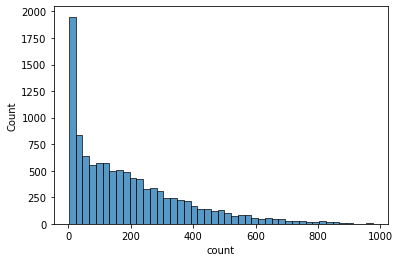

In [45]:
sns.histplot(train["count"])

In [46]:
np.log(train["count"])

0        2.772589
1        3.688879
2        3.465736
3        2.564949
4        0.000000
           ...   
10881    5.817111
10882    5.484797
10883    5.123964
10884    4.859812
10885    4.477337
Name: count, Length: 10886, dtype: float64

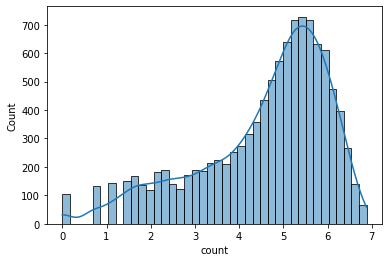

In [47]:
# 데이터 분포를 골고루 -> exp

sns.histplot(np.log(train["count"]), kde=True)


In [48]:
train["log_count"]=np.log(train["count"])

train.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,log_count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2.772589


In [49]:
train.head(1)

# 연도월 합쳐진 형태 -> 일단 분리시키기 (데이터의 시작을 알 수 있음)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,log_count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2.772589


In [50]:
datetime=pd.to_datetime(train["datetime"])

In [51]:
# 연
train["year"]=datetime.dt.year
# 월
train["month"]=datetime.dt.month
# 일
train["day"]=datetime.dt.day
# 시
train["hour"]=datetime.dt.hour
# 분
train["min"]=datetime.dt.minute
# 초
train["sec"]=datetime.dt.second

# 요일
train["dayOfWeek"]=datetime.dt.dayofweek


In [52]:
train.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,log_count,year,month,day,hour,min,sec,dayOfWeek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2.772589,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,3.688879,2011,1,1,1,0,0,5


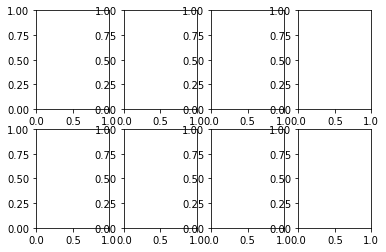

In [53]:
# 대여량과 전체를 비교해보기
# subplot으로 그리기

figure, ax = plt.subplots(nrows=2,ncols=4)

In [54]:
ax


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000180F97D3708>,
      dtype=object)

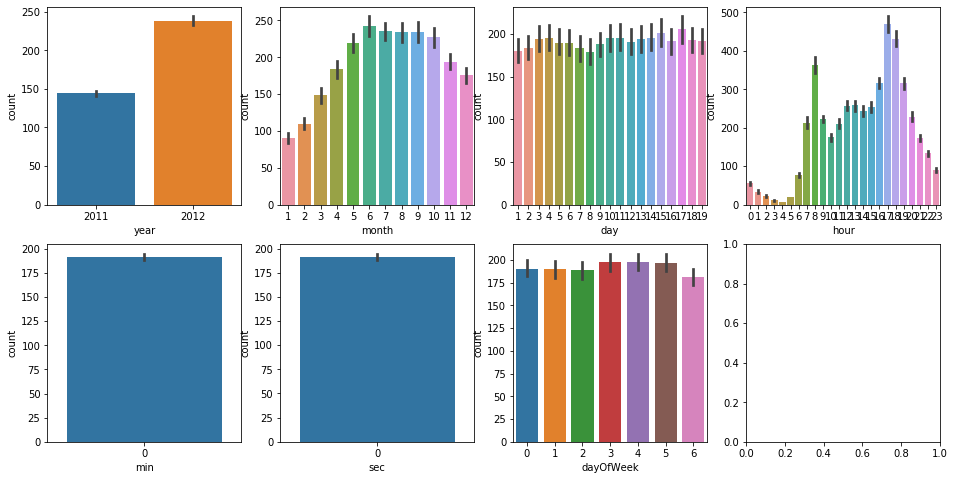

In [55]:
figure, ax = plt.subplots(nrows=2,ncols=4)

sns.barplot(data=train, x="year" , y="count", ax=ax[0][0])
sns.barplot(data=train, x="month" , y="count", ax=ax[0][1])
sns.barplot(data=train, x="day" , y="count", ax=ax[0][2])
sns.barplot(data=train, x="hour" , y="count", ax=ax[0][3])
# ax[0,0]이라고 해도 무방함.

sns.barplot(data=train, x="min" , y="count", ax=ax[1][0])
sns.barplot(data=train, x="sec" , y="count", ax=ax[1][1])
sns.barplot(data=train, x="dayOfWeek" , y="count", ax=ax[1][2])

figure.set_size_inches(16,8)

In [56]:
# 데이터에는 11년도, 12년도의 데이터가 있음. 
# 날짜는 1-19일까지
# 분, 초는 입력되지 않은 데이터
# 시간은 오전 8시, 오후 7-8시에 수가 많음 

In [57]:
datetime=pd.to_datetime(test["datetime"])

In [58]:
# 연
test["year"]=datetime.dt.year
# 월
test["month"]=datetime.dt.month
# 일
test["day"]=datetime.dt.day
# 시
test["hour"]=datetime.dt.hour
# 분
test["min"]=datetime.dt.minute
# 초
test["sec"]=datetime.dt.second

# 요일
test["dayOfWeek"]=datetime.dt.dayofweek

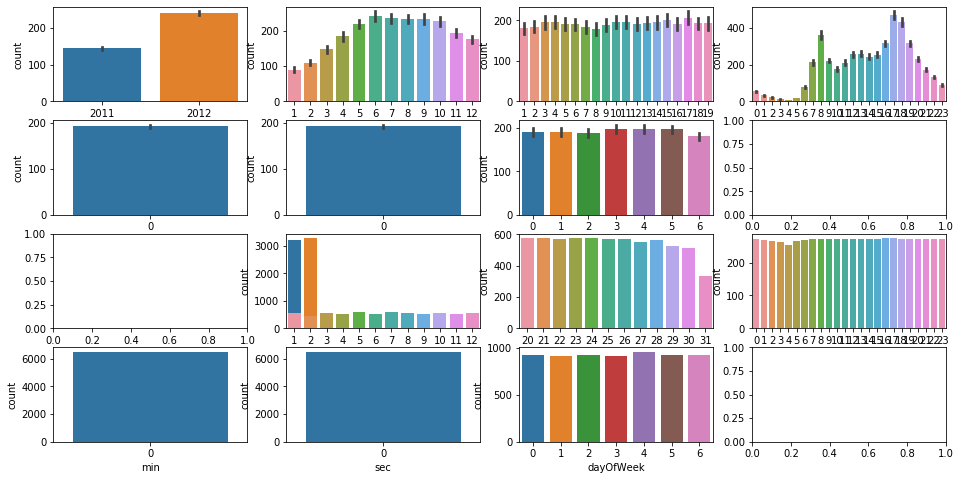

In [59]:
figure, ax = plt.subplots(nrows=4,ncols=4)

sns.barplot(data=train, x="year" , y="count", ax=ax[0][0])
sns.barplot(data=train, x="month" , y="count", ax=ax[0][1])
sns.barplot(data=train, x="day" , y="count", ax=ax[0][2])
sns.barplot(data=train, x="hour" , y="count", ax=ax[0][3])
# ax[0,0]이라고 해도 무방함.

sns.barplot(data=train, x="min" , y="count", ax=ax[1][0])
sns.barplot(data=train, x="sec" , y="count", ax=ax[1][1])
sns.barplot(data=train, x="dayOfWeek" , y="count", ax=ax[1][2])

sns.countplot(data=test, x="year" , ax=ax[2][1])
sns.countplot(data=test, x="month" , ax=ax[2][1])
sns.countplot(data=test, x="day" , ax=ax[2][2])
sns.countplot(data=test, x="hour", ax=ax[2][3])
# ax[0,0]이라고 해도 무방함.

sns.countplot(data=test, x="min", ax=ax[3][0])
sns.countplot(data=test, x="sec" , ax=ax[3][1])
sns.countplot(data=test, x="dayOfWeek", ax=ax[3][2])

figure.set_size_inches(16,8)

In [60]:
# year, month, hour, dayofweek,써먹기


In [61]:
train.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,log_count,year,month,day,hour,min,sec,dayOfWeek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2.772589,2011,1,1,0,0,0,5


### machine learning - modeling

 1. feature정하기  
 2. algorithm 정하기  
 

In [62]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'log_count', 'year', 'month', 'day', 'hour', 'min', 'sec', 'dayOfWeek'],
      dtype='object')

In [63]:
f_names=['workingday', 'weather', 'temp',
        'humidity',
       'year', 'month', 'day', 'hour', 'dayOfWeek']

In [64]:
label="count"
label="log_count"

In [65]:
# 추출 후 학습시키기 
# 문제와 정답을 ㅁ=분리시키기 

In [66]:
train[f_names] #feature

,workingday,weather,temp,humidity,year,month,day,hour,dayOfWeek
0,0,1,9.84,81,2011,1,1,0,5
1,0,1,9.02,80,2011,1,1,1,5
2,0,1,9.02,80,2011,1,1,2,5
3,0,1,9.84,75,2011,1,1,3,5
4,0,1,9.84,75,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...
10881,1,1,15.58,50,2012,12,19,19,2
10882,1,1,14.76,57,2012,12,19,20,2
10883,1,1,13.94,61,2012,12,19,21,2
10884,1,1,13.94,61,2012,12,19,22,2


In [67]:
train[label] #target

0        2.772589
1        3.688879
2        3.465736
3        2.564949
4        0.000000
           ...   
10881    5.817111
10882    5.484797
10883    5.123964
10884    4.859812
10885    4.477337
Name: log_count, Length: 10886, dtype: float64

In [68]:
# x값 y값
X_train=train[f_names]
# train의 feature

y_train=train[label]
# train의 label


In [69]:
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,min,sec,dayOfWeek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,19,0,0,0
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,20,0,0,0
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,2012,12,31,21,0,0,0
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,2012,12,31,22,0,0,0


In [70]:
X_test=test[f_names]


### Regression - ensemble methods -> random forest

In [71]:
from sklearn.ensemble import RandomForestRegressor

In [72]:
rf_reg=RandomForestRegressor()
# 사용하려면 함수처럼 파라미터를 받을 수 있게 선언해야 함.

In [73]:
# 학습시키고 예측시킨다.

# 문제와 정답을 학습시킨다
rf_reg.fit(X_train, y_train)

C:\Users\82103\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [74]:
pred=rf_reg.predict(X_test)
pred
# 문제를 주면 답을 리턴한다.

array([2.58292766, 1.70139551, 1.2504576 , ..., 5.17196397, 4.8308048 ,
       4.13026219])

In [79]:
np.exp(pred)

array([ 13.23583148,   5.48159166,   3.49194049, ..., 176.26066871,
       125.31177094,  62.19422753])

In [80]:
pred=np.exp(pred)

In [81]:
pd.DataFrame(rf_reg.feature_importances_, index=X_train.columns,
             columns=["f_importance"]).sort_values(by='f_importance', ascending=False)

# 각 칼럼별 중요도를 알 수 있음.

,f_importance
hour,0.755219
temp,0.052332
month,0.046946
dayOfWeek,0.037139
workingday,0.032319
year,0.032086
humidity,0.021778
day,0.011395
weather,0.010786


### submission

In [75]:
submission["count"]=pred

In [76]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,2.582928
1,2011-01-20 01:00:00,1.701396
2,2011-01-20 02:00:00,1.250458
3,2011-01-20 03:00:00,1.143128
4,2011-01-20 04:00:00,1.171896


In [77]:
submission.to_csv("kaggle_bike_2022_01_13.csv", index=False)


### 뭘 해야할지 모르겠을 때 -> correlation 확인  

선형성을 따지는 것: A 증가 -> B 증가
1에 가까우면 해당 컬럼과 가까워지는 것.     
0.4~0.7 사이에 있으면 관계가 있다고 볼 수 있다.  



In [78]:
train.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,log_count,year,month,day,hour,min,sec,dayOfWeek
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,0.161126,-0.004797,0.971524,0.001729,-0.006546,NaN,NaN,-0.010553
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,-0.000435,0.012021,0.001731,-0.015877,-0.000354,NaN,NaN,-0.191832
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.018126,-0.002482,-0.003394,0.009829,0.002780,NaN,NaN,-0.704267
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.106078,-0.012548,0.012144,-0.007890,-0.022740,NaN,NaN,-0.047692
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.373913,0.061226,0.257589,0.015551,0.145430,NaN,NaN,-0.038466
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.369587,0.058540,0.264173,0.011866,0.140343,NaN,NaN,-0.040235
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.327998,-0.078606,0.204537,-0.011335,-0.278011,NaN,NaN,-0.026507
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,0.120310,-0.015221,-0.150192,0.036157,0.146631,NaN,NaN,-0.024804
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.568500,0.145241,0.092722,0.014109,0.302045,NaN,NaN,0.246959
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.778334,0.264265,0.169451,0.019111,0.380540,NaN,NaN,-0.084427
